In [1]:
import numpy as np
import pandas as pd
import sklearn
import numpy as np

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-03.parquet')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-03-01 00:10:52,2024-03-01 00:26:12,N,1.0,129,226,1.0,1.72,12.80,1.0,0.5,3.06,0.00,NaN,1.0,18.36,1.0,1.0,0.00
1,2,2024-03-01 00:22:21,2024-03-01 00:35:15,N,1.0,130,218,1.0,3.25,17.70,1.0,0.5,0.00,0.00,NaN,1.0,20.20,2.0,1.0,0.00
2,2,2024-03-01 00:45:27,2024-03-01 01:04:32,N,1.0,255,107,2.0,4.58,23.30,1.0,0.5,3.50,0.00,NaN,1.0,32.05,1.0,1.0,2.75
3,1,2024-03-01 00:02:00,2024-03-01 00:23:45,N,1.0,181,71,1.0,0.00,22.50,0.0,1.5,0.00,0.00,NaN,1.0,24.00,1.0,1.0,0.00
4,2,2024-03-01 00:16:45,2024-03-01 00:23:25,N,1.0,95,135,1.0,1.15,8.60,1.0,0.5,1.00,0.00,NaN,1.0,12.10,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57452,2,2024-03-31 21:19:00,2024-03-31 21:30:00,None,NaN,25,61,NaN,1.45,12.08,0.0,0.0,2.52,0.00,NaN,1.0,15.60,NaN,NaN,NaN
57453,2,2024-03-31 22:30:00,2024-03-31 22:35:00,None,NaN,41,42,NaN,1.13,12.24,0.0,0.0,0.00,0.00,NaN,1.0,13.24,NaN,NaN,NaN
57454,2,2024-03-31 22:43:00,2024-03-31 22:48:00,None,NaN,223,7,NaN,13062.08,12.08,0.0,0.0,3.77,0.00,NaN,1.0,16.85,NaN,NaN,NaN
57455,2,2024-03-31 22:48:00,2024-03-31 23:12:00,None,NaN,42,249,NaN,7.96,40.52,0.0,0.0,8.75,0.00,NaN,1.0,53.02,NaN,NaN,NaN


In [3]:

shape_of_data = df.shape
print("Shape of the dataset:", shape_of_data)


Shape of the dataset: (57457, 20)


Q1. Prepare the dataset
Start with baseline_model_nyc_taxi_data.ipynb. Download the March 2024 Green Taxi data. We will use this data to simulate a production usage of a taxi trip duration prediction service.

What is the shape of the downloaded data? How many rows are there?

72044
78537
57457
54396

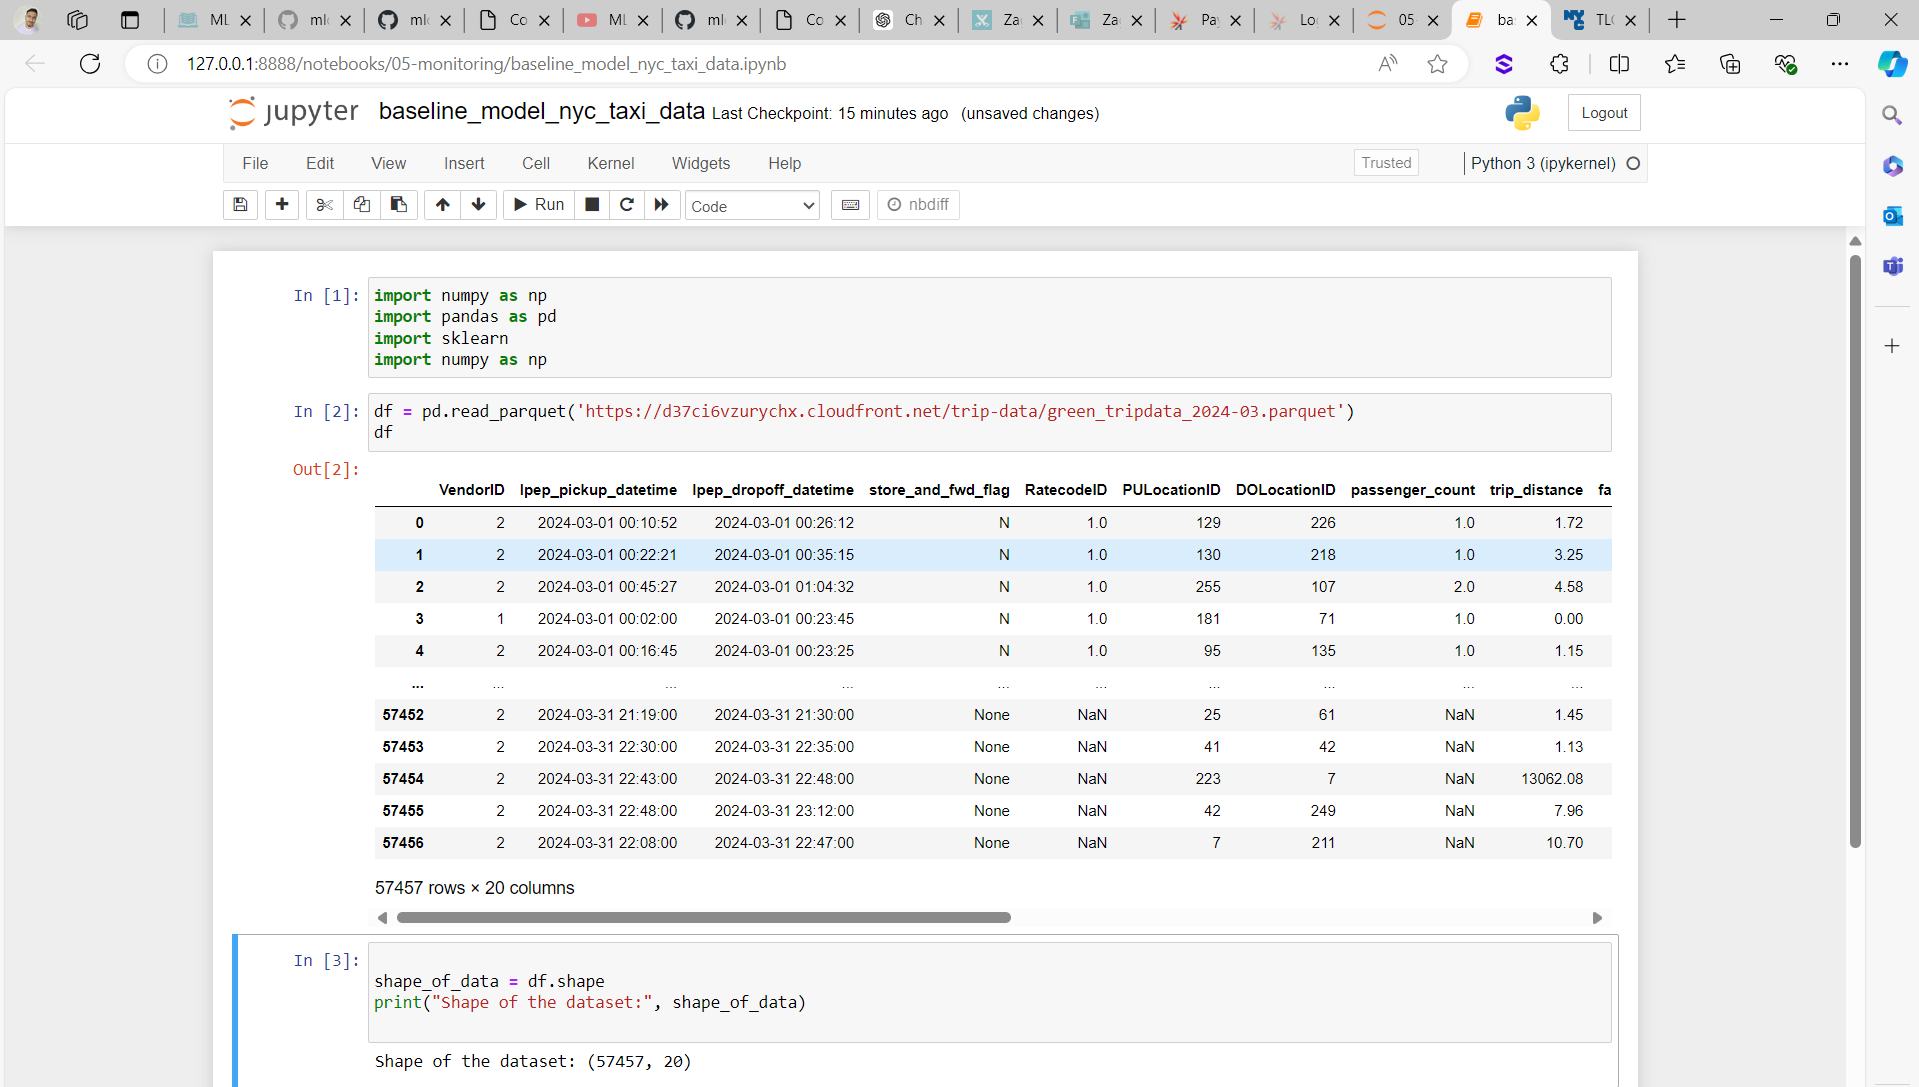

Answer: 57457

In [5]:
!pip install evidently

     |████████████████████████████████| 3.4 MB 978 kB/s eta 0:00:01
     |████████████████████████████████| 121 kB 92.7 MB/s eta 0:00:01
     |████████████████████████████████| 38.6 MB 69.1 MB/s eta 0:00:01     |██████████████████████████████▌ | 36.8 MB 69.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 47 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 19.3 MB 70.5 MB/s eta 0:00:01
     |████████████████████████████████| 164 kB 71.7 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 484 kB/s  eta 0:00:01
     |████████████████████████████████| 530 kB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 16.4 MB 68.0 MB/s eta 0:00:01    |██████▏                         | 3.1 MB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 230 kB 101.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.3 MB/s s eta 0:00:01
     |██████████████████████████████

     |████████████████████████████████| 1.2 MB 93.7 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 78.8 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 109.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 76.6 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 96.7 MB/s eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Uninstalling certifi-2021.10.8:
      Successfully uninstalled certifi-2021.10.8
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1

In [6]:
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection
from evidently.metrics import ColumnQuantileMetric

# Calculate quantile for fare_amount column
quantile_metric = ColumnQuantileMetric(df[['fare_amount']], column_id='fare_amount', quantile=0.5)
quantile_value = quantile_metric['metrics']['values']['0.5']

# Output the chosen metric and the calculated quantile value
print("Chosen metric:", quantile_metric.metric_name)
print(f"Quantile value for fare_amount column (quantile=0.5): {quantile_value}")


ModuleNotFoundError: No module named 'evidently.dashboard'

In [7]:
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection
from evidently.metrics import ColumnQuantileMetric


ModuleNotFoundError: No module named 'evidently.dashboard'

In [8]:
!pip install evidently

In [9]:
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection
from evidently.metrics import ColumnQuantileMetric

ModuleNotFoundError: No module named 'evidently.dashboard'

In [10]:
python --version


NameError: name 'python' is not defined

In [11]:
!python --version


Python 3.9.12


In [12]:
!python -m site

sys.path = [
    '/workspaces/mlops-zoomcamp/05-monitoring',
    '/home/codespace/anaconda3/lib/python39.zip',
    '/home/codespace/anaconda3/lib/python3.9',
    '/home/codespace/anaconda3/lib/python3.9/lib-dynload',
    '/home/codespace/anaconda3/lib/python3.9/site-packages',
]
USER_BASE: '/home/codespace/.local' (exists)
USER_SITE: '/home/codespace/.local/lib/python3.9/site-packages' (doesn't exist)
ENABLE_USER_SITE: True


In [13]:
!pip show evidently


Name: evidently
Version: 0.4.30
Summary: Open-source tools to analyze, monitor, and debug machine learning model in production.
Home-page: https://github.com/evidentlyai/evidently
Author: Emeli Dral
Author-email: emeli.dral@gmail.com
License: UNKNOWN
Location: /home/codespace/anaconda3/lib/python3.9/site-packages
Requires: pydantic, PyYAML, scipy, numpy, litestar, watchdog, plotly, dynaconf, ujson, urllib3, fsspec, typing-inspect, rich, requests, scikit-learn, uvicorn, iterative-telemetry, statsmodels, typer, certifi, pandas, nltk
Required-by: 
